In [23]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from matplotlib.animation import FuncAnimation

# Parameters
N = 30  # number of Fock states
omega = 1.0  # frequency of the oscillator
kappa = 0.2  # dissipation rate
kerr = 0.1  # Kerr nonlinearity
tlist = np.linspace(0, 10, 100)  # time list

# Creation and annihilation operators
a = destroy(N)

# Hamiltonian
H = omega * a.dag() * a + kerr * a.dag() * a.dag() * a * a

# Initial state (coherent state)
alpha = 0#2.0
psi0 = coherent(N, alpha)

# Collapse operators (photon loss)
x = a + a.dag()
p = -1j * (a - a.dag())
delta = 0.01
a_new = x/delta + 1j*p*delta
c_ops = [np.sqrt(kappa) * a_new]

# Solve the master equation
result = mesolve(H, psi0, tlist, c_ops, [], options=Options(nsteps=100000))


# Generate Wigner function frames
xvec = np.linspace(-5, 5, 200)
wigner_frames = []

for state in result.states:
    W = wigner(state, xvec, xvec)
    wigner_frames.append(W)



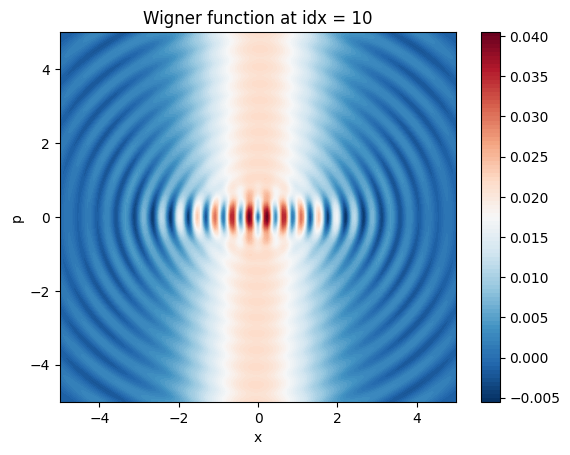

In [24]:
idx = 10
wigner_func = wigner_frames[idx]
# Plot the Wigner function
plt.figure()
plt.contourf(xvec, xvec, wigner_func, 100, cmap='RdBu_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('p')
plt.title('Wigner function at idx = {}'.format(idx))
plt.show()

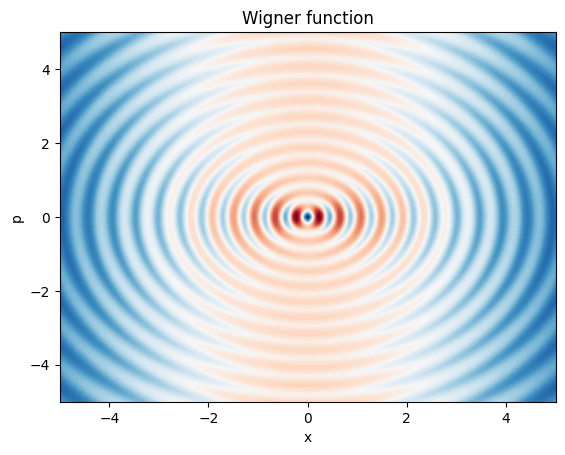

In [25]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Create a movie from the Wigner function frames
fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    ax.contourf(xvec, xvec, frame, 100, cmap='RdBu_r')
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.set_title('Wigner function')

ani = FuncAnimation(fig, update, frames=wigner_frames, repeat=False)

# Save the movie as a GIF
writer = PillowWriter(fps=15)
ani.save('wigner_function_movie.gif', writer=writer)

plt.show()